# Imports:

In [559]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence

# Classes:

In [492]:
class BallisticDeposition:
    """
    class fields :
    colors:the list of colors used in visualization

    the class to model Ballistic Deposition
    methods:
    step:
        the function to add an amount of objects

    miniStep:
        the function to add one object

    run:
        the function to do the process of Ballistic Deposition

    visualize:
        the function to show the states of the process

    result:
        the function to show the result of the process

    checkY:
        the function to check the heights of the index before,after and the input index to result the final height of the falling object

    """
    colors = ["blue","red"]
    def __init__(self, miniSteps: int, steps: int, length: int, max: int) -> None:
        """
        the function to create the Ballistic Deposition model object

        :param max: the max height of the map
        :type max: int
        :param miniSteps: the amount of objects added after a step
        :type miniSteps: int
        :param steps: the amount of steps in the process
        :type steps: int
        :param length: the size of the platform in Ballistic Deposition
        :type length: int
        """
        self.miniSteps = miniSteps
        self.steps = steps
        self.length = length
        self.w = []
        self.t =range(1,steps+1)
        self.map = np.zeros((max,self.length),dtype="float16")
        self.heights = np.zeros(self.length,dtype=int)


    def step(self,i) -> None:
        """
        the function to add an amount of objects
        """
        for _ in range(self.miniSteps):
            self.miniStep(i)


    def miniStep(self,i) -> None:
        """
        the function to add one object
        """
        x = int(np.random.uniform(0,self.length))
        y = self.checkY(x)
        self.map[y-1][x] = i
        self.heights[x] = y

    def run(self) -> None:
        """
        the function to do the process of Ballistic Deposition
        """
        for i in range(1,self.steps+1):
            self.step(i)
            self.w.append(np.std(self.heights))

    def visualize(self) -> None:
        """
        the function to show the states of the process
        """
        plt.clf()
        for i in range(1,self.steps+1):
            plt.imshow(self.map[::-1])

    def result(self) -> None:
        """
        the function to show the result of the process
        """
        plt.plot(self.t,self.w)
        plt.title("w(t): ")
        plt.show()
        tArray = np.array(self.t)
        sigmasArray = np.array(self.w)
        logSigmas = np.log10(sigmasArray)
        logT = np.log10(tArray)
        plt.plot(logT,logSigmas)
        plt.title("logW(logT): ")
        plt.show()

        print("r2 for log(w) and log(t): ",np.corrcoef(logT, logSigmas)[0][1])
        print("beta: ",np.polyfit(logT,logSigmas,1)[0])



    def checkY(self, index: int) -> int:
        """
        the function to check the heights of the index before,after and the input index to result the final height of the falling object

        :param index: the random inout index
        :type index: int
        :return: the final height of the falling object
        :rtype: int
        """
        y = int(max(self.heights[(index - 1) % self.length], self.heights[index], self.heights[(index + 1) % self.length]))
        if y==self.heights[index] :
            return y+1
        else :
            return y


# Main Part:

In [458]:
bd = BallisticDeposition(100,100,200,150)

In [459]:
bd.run()

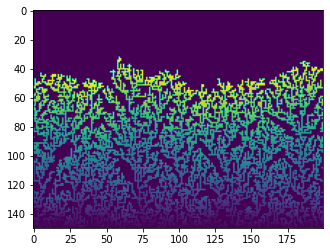

In [460]:
bd.visualize()

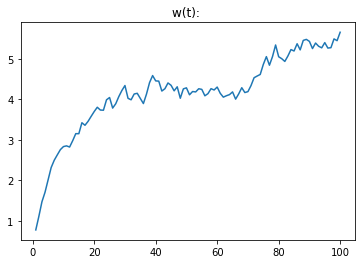

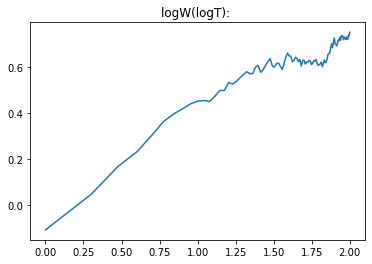

r2 for log(w) and log(t):  0.9490028045610939
beta:  0.3271869976645884


In [461]:
bd.result()

# Iterating:

In [493]:
def getMean(miniSteps: int, steps: int, length: int, iterations: int, max: int) -> np.array:
    """
    the function to perform iterations on BallisticDeposition

    :param max:the max height of the map
    :type max: int
    :param miniSteps: the amount of objects added after a step
    :type miniSteps: int
    :param steps: the amount of steps in the process
    :type steps: int
    :param length: the size of the platform in Ballistic Deposition
    :type length: int
    :param iterations:
    :type iterations:int
    :return:the mean w of the iterations
    :rtype:np.array
    """

    ws = []
    for _ in range(iterations):
        bd = BallisticDeposition(miniSteps,steps,length,max)
        bd.run()
        ws.append(bd.w)
        del bd

    wsArr = np.array(ws)
    meansW = wsArr.mean(axis=0)
    return meansW

### trying for different lengths:

In [479]:
meansW1 = getMean(2000,100,200,200,4000)

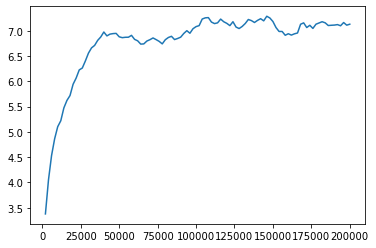

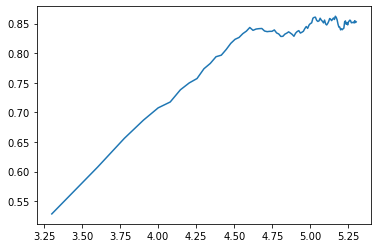

In [499]:
plt.plot(np.array(range(1,101))*2000,meansW1)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*2000),np.log10(meansW1))
plt.show()

In [485]:
meansW2 = getMean(10,100,20,150,500)

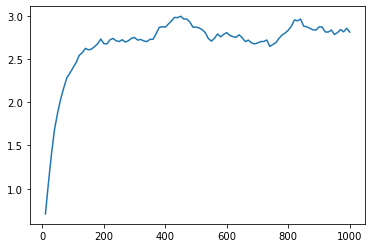

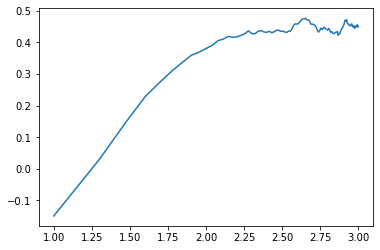

In [500]:
plt.plot(np.array(range(1,101))*10,meansW2)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*10),np.log10(meansW2))
plt.show()

In [481]:
meansW3 = getMean(1000,100,150,200,2000)

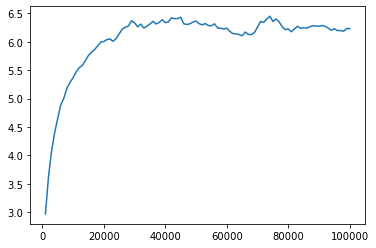

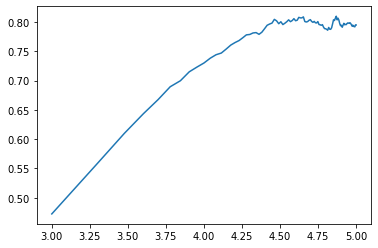

In [501]:
plt.plot(np.array(range(1,101))*1000,meansW3)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*1000),np.log10(meansW3))
plt.show()

In [487]:
meansW4 = getMean(500,100,50,1000,5000)

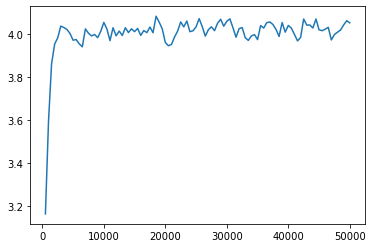

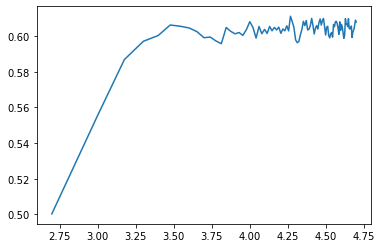

In [502]:
plt.plot(np.array(range(1,101))*500,meansW4)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*500),np.log10(meansW4))
plt.show()

In [483]:
meansW5 = getMean(1000,100,100,500,4000)

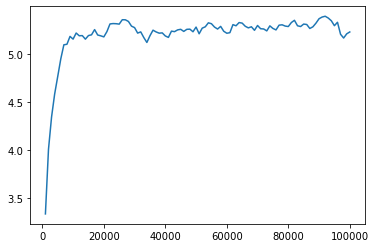

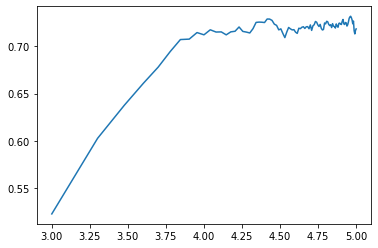

In [503]:
plt.plot(np.array(range(1,101))*1000,meansW5)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*1000),np.log10(meansW5))
plt.show()

In [560]:
def getCrossingPoint(meanW: np.array, scale: int) -> Sequence:
    """
    the function to get the crossing point og=f each plot

    :param scale:the scaling param for time
    :type scale: int
    :rtype: object
    """
    lastPart = np.log10(meanW[:int(len(meanW)/2 -1):-1])
    firstPart = np.log10(meanW[:5])
    logWStar = np.mean(lastPart)
    m = (firstPart[1]-firstPart[0])/(np.log10(np.array(4*scale)))
    return logWStar,m


#### getting data for corossing points and calculating beta  , alpha and z

In [556]:
means = [meansW1,meansW2,meansW3,meansW4,meansW5]
scales = [2000,10,1000,500,1000]
logLs = np.log10(np.array([200,20,150,50,100]))
logWStars = []
ms = []
for i in range(5):
    x,y = getCrossingPoint(means[i],scales[i])
    logWStars.append(x)
    ms.append(y)

beta = np.mean(ms)
alpha = np.polyfit(logLs,logWStars,1)[0]
z = alpha/beta

#### plotting log(w*) and log(L) and printing the result

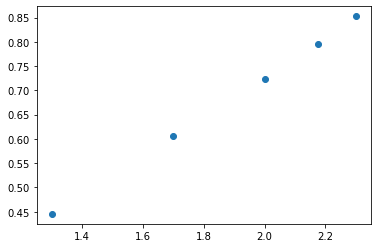


 alpha is : 0.4043652954778262

 beta is : 0.03908639454875694

 x is : 10.345423264185062


In [557]:
plt.scatter(logLs,logWStars)
plt.show()

print("\n alpha is :",alpha)
print("\n beta is :",beta)
print("\n x is :",z)

In [693]:
class BallisticDepositionTree:
    """
    class fields :
    colors:the list of colors used in visualization

    the class to model Ballistic Deposition
    methods:
    step:
        the function to add an amount of objects

    miniStep:
        the function to add one object

    run:
        the function to do the process of Ballistic Deposition

    visualize:
        the function to show the states of the process

    result:
        the function to show the result of the process

    checkY:
        the function to check the heights of the index before,after and the input index to result the final height of the falling object

    """
    colors = ["blue","red"]
    def __init__(self, miniSteps: int, steps: int, length: int, max: int) -> None:
        """
        the function to create the Ballistic Deposition model object

        :param max: the max height of the map
        :type max: int
        :param miniSteps: the amount of objects added after a step
        :type miniSteps: int
        :param steps: the amount of steps in the process
        :type steps: int
        :param length: the size of the platform in Ballistic Deposition
        :type length: int
        """
        self.miniSteps = miniSteps
        self.steps = steps
        self.length = length
        self.w = []
        self.t =np.array(range(1,steps+1))
        self.map = np.zeros((max,self.length),dtype="int")
        self.heights = np.zeros(self.length,dtype=int)
        self.widths = []
        self.maxX = int(self.length/2)
        self.minX = int(self.length/2)

    def step(self,i) -> None:
        """
        the function to add an amount of objects
        """
        for _ in range(self.miniSteps):
            self.miniStep(i)


    def miniStep(self,i) -> None:
        """
        the function to add one object
        """
        x = int(np.random.uniform(0,self.length))
        y = self.checkY(x)
        if (y!=1)|(x==int(self.length/2)):
            self.map[y-1][x] = i
            self.heights[x] = y
            if x>self.maxX: self.maxX=x
            if x<self.minX: self.minX=x


    def run(self) -> None:
        """
        the function to do the process of Ballistic Deposition
        """
        for i in range(1,self.steps+1):
            self.step(i)
            self.widths.append(self.maxX-self.minX)

    def visualize(self) -> None:
        """
        the function to show the states of the process
        """
        plt.clf()
        for i in range(1,self.steps+1):
            plt.imshow(self.map[::-1])

    def result(self) -> None:
        """
        the function to show the result of the process
        """
        plt.plot(self.t*self.miniSteps,self.widths)
        plt.title("width(t): ")
        plt.show()
        tArray = np.array(self.t*self.miniSteps)
        sigmasArray = np.array(self.widths)
        logSigmas = np.log10(sigmasArray)
        logT = np.log10(tArray)
        plt.plot(logT,logSigmas)
        plt.title("logWidth(logT): ")
        plt.show()

        print("r2 for log(width) and log(t): ",np.corrcoef(logT, logSigmas)[0][1])
        print("beta: ",np.polyfit(logT,logSigmas,1)[0])



    def checkY(self, index: int) -> int:
        """
        the function to check the heights of the index before,after and the input index to result the final height of the falling object

        :param index: the random inout index
        :type index: int
        :return: the final height of the falling object
        :rtype: int
        """
        y = int(max(self.heights[(index - 1) % self.length], self.heights[index], self.heights[(index + 1) % self.length]))
        if y==self.heights[index] :
            return y+1
        else :
            return y


In [702]:
bdt = BallisticDepositionTree(600,30,200,200)

In [703]:
bdt.run()

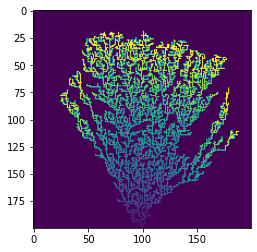

In [704]:
bdt.visualize()

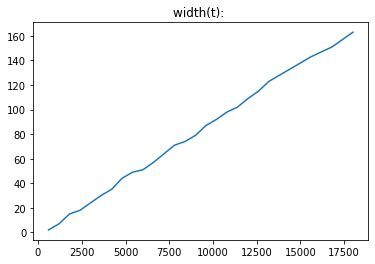

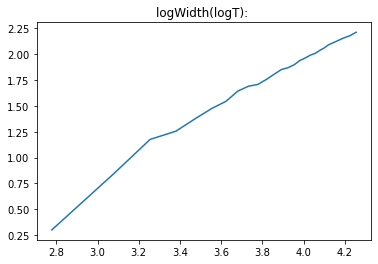

r2 for log(width) and log(t):  0.9930085259883469
beta:  1.18458942082714


In [705]:
bdt.result()